# Assignment 6: Apply NB

<h1>2. Naive Bayes </h1>

## 1.1 Loading Data

In [3]:
#make sure you are loading atleast 50k datapoints
#you can work with features of preprocessed_data.csv for the assignment.
# If you want to add more features, you can add. (This is purely optional, not mandatory)

import pandas
data = pandas.read_csv('preprocessed_data.csv')

In [4]:
data.head(3)

,school_state,teacher_prefix,project_grade_category,teacher_number_of_previously_posted_projects,project_is_approved,clean_categories,clean_subcategories,essay,price
0,ca,mrs,grades_prek_2,53,1,math_science,appliedsciences health_lifescience,i fortunate enough use fairy tale stem kits cl...,725.05
1,ut,ms,grades_3_5,4,1,specialneeds,specialneeds,imagine 8 9 years old you third grade classroo...,213.03
2,ca,mrs,grades_prek_2,10,1,literacy_language,literacy,having class 24 students comes diverse learner...,329.00


<h2>1.2 Splitting data into Train and cross validation(or test): Stratified Sampling</h2>

In [5]:
# write your code in following steps for task 1
# 1. Split your data.
# 2. Perform Bag of Words Vectorization of text data.
# 3. Perform tfidf vectorization of text data.
# 4. perform one-hot encoding of categorical features.
# 5. perform normalization of numerical features
# 6. For set 1 stack up all the features using hstack()
# 7. For set 2 stack up all the features using hstack()
# 8. Perform hyperparameter tuning and represent the training and cross-validation AUC scores for different 'alpha' values, using a 2D line plot.
# 9. Find the best hyperparameter 'alpha' and fit the model. Plot ROC-AUC curve(by obtaining the probabilities using 'predict proba' method)
# 10. Plot confusion matrix based on the best threshold value
# 11. Either for the model in set 1 or in set 2, print the top 20 features(you have to print the names, not the indexes) associated with the positive and negative classes each.
# 12. Summarize your observations and compare both the models(ie., from set 1 and set 2) in terms of optimal hyperparameter value, train AUC and test AUC scores. 
# 13. You can use Prettytable or any other tabular format for comparison.


# please write all the code with proper documentation, and proper titles for each subsection
# go through documentations and blogs before you start coding
# first figure out what to do, and then think about how to do.
# reading and understanding error messages will be very much helpfull in debugging your code
# when you plot any graph make sure you use 
    # a. Title, that describes your plot, this will be very helpful to the reader
    # b. Legends if needed
    # c. X-axis label
    # d. Y-axis label
from sklearn.model_selection import train_test_split
X = data.loc[ : , data.columns != 'project_is_approved']
y = data.loc[ : , data.columns == 'project_is_approved']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, stratify=y)
X_train, X_cv, y_train, y_cv = train_test_split(X_train, y_train, test_size=0.33, stratify=y_train)



In [6]:
# Split the dataset 
# 1) If you want to apply simple cross-validation, split the dataset into 3 parts (ie., train, CV and test sets)
# 2) If you want to apply K-fold CV (or) GridSearch Cross Validation (or) Randomized Search Cross Validation, just split the dataset into 2 parts (ie., train and test sets)
y = data['project_is_approved'].values
X = data.drop(['project_is_approved'], axis=1)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, stratify=y)
X_train, X_cv, y_train, y_cv = train_test_split(X_train, y_train, test_size=0.33, stratify=y_train)

print(X_train.shape, y_train.shape)
print(X_cv.shape, y_cv.shape)
print(X_test.shape, y_test.shape)

print("="*100)






(49041, 8) (49041,)
(24155, 8) (24155,)
(36052, 8) (36052,)


<h2>1.3 Make Data Model Ready: encoding essay, and project_title</h2>

In [7]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve, auc

import re
# Tutorial about Python regular expressions: https://pymotw.com/2/re/

import pickle
from tqdm import tqdm
import os

from collections import Counter
# Apply Bag of Words (BOW) vectorization on 'Preprocessed_Essay' 
# Apply Bag of Words (BOW) vectorization on 'Preprocessed_Title' (Optional)
vectorizer = CountVectorizer(min_df=10,ngram_range=(1,4), max_features=5000)
vectorizer.fit(X_train['essay'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
X_train_essay_bow = vectorizer.transform(X_train['essay'].values)
X_cv_essay_bow = vectorizer.transform(X_cv['essay'].values)
X_test_essay_bow = vectorizer.transform(X_test['essay'].values)

print("After vectorizations")
print(X_train_essay_bow.shape, y_train.shape)
print(X_cv_essay_bow.shape, y_cv.shape)
print(X_test_essay_bow.shape, y_test.shape)
print("="*100)



After vectorizations
(49041, 5000) (49041,)
(24155, 5000) (24155,)
(36052, 5000) (36052,)


In [199]:
# Apply TF-IDF vectorization on 'Preprocessed_Essay' 
# Apply TF-IDF vectorization on 'Preprocessed_Title' (Optional)
vectorizer = TfidfVectorizer(min_df=10)
vectorizer.fit(X_train['essay'].values)
X_train_essay_tfidf = vectorizer.transform(X_train['essay'].values)
X_cv_essay_tfidf = vectorizer.transform(X_cv['essay'].values)
X_test_essay_tfidf = vectorizer.transform(X_test['essay'].values)
print("After vectorizations")
print(X_train_essay_tfidf.shape, y_train.shape)
print(X_cv_essay_tfidf.shape, y_cv.shape)
print(X_test_essay_tfidf.shape, y_test.shape)
print("="*100)
feature_names = vectorizer.get_feature_names()

After vectorizations
(49041, 12126) (49041,)
(24155, 12126) (24155,)
(36052, 12126) (36052,)


In [200]:
len(feature_names)

12126

<h2>1.4 Make Data Model Ready: encoding numerical, categorical features</h2>

In [201]:
# Apply One-Hot Encoding on the categorical features either using OneHotEncoder() (or) CountVectorizer(binary=True)
# Apply Normalization on the numerical features using Normalizer().
vectorizer = CountVectorizer(binary=True)
vectorizer.fit(X_train['school_state'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
X_train_state_ohe = vectorizer.transform(X_train['school_state'].values)
X_cv_state_ohe = vectorizer.transform(X_cv['school_state'].values)
X_test_state_ohe = vectorizer.transform(X_test['school_state'].values)


state_feature_names = vectorizer.get_feature_names()
print("After vectorizations")
print(X_train_state_ohe.shape, y_train.shape)
print(X_cv_state_ohe.shape, y_cv.shape)
print(X_test_state_ohe.shape, y_test.shape)
print(vectorizer.get_feature_names())
print("="*100)

vectorizer = CountVectorizer(binary=True)
vectorizer.fit(X_train['teacher_prefix'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
X_train_teacher_ohe = vectorizer.transform(X_train['teacher_prefix'].values)
X_cv_teacher_ohe = vectorizer.transform(X_cv['teacher_prefix'].values)
X_test_teacher_ohe = vectorizer.transform(X_test['teacher_prefix'].values)

teacher_feature_names = vectorizer.get_feature_names()

print("After vectorizations")
print(X_train_teacher_ohe.shape, y_train.shape)
print(X_cv_teacher_ohe.shape, y_cv.shape)
print(X_test_teacher_ohe.shape, y_test.shape)
print(vectorizer.get_feature_names())
print("="*100)

vectorizer = CountVectorizer(binary=True)
vectorizer.fit(X_train['project_grade_category'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
X_train_grade_ohe = vectorizer.transform(X_train['project_grade_category'].values)
X_cv_grade_ohe = vectorizer.transform(X_cv['project_grade_category'].values)
X_test_grade_ohe = vectorizer.transform(X_test['project_grade_category'].values)

grade_feature_names = vectorizer.get_feature_names()

print("After vectorizations")
print(X_train_grade_ohe.shape, y_train.shape)
print(X_cv_grade_ohe.shape, y_cv.shape)
print(X_test_grade_ohe.shape, y_test.shape)
print(vectorizer.get_feature_names())
print("="*100)

vectorizer = CountVectorizer(binary=True)
vectorizer.fit(X_train['clean_categories'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
X_train_clean_categories_ohe = vectorizer.transform(X_train['clean_categories'].values)
X_cv_clean_categories_ohe = vectorizer.transform(X_cv['clean_categories'].values)
X_test_clean_categories_ohe = vectorizer.transform(X_test['clean_categories'].values)

clean_categories_feature_names = vectorizer.get_feature_names()

vectorizer = CountVectorizer(binary=True)
vectorizer.fit(X_train['clean_subcategories'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
X_train_clean_subcategories_ohe = vectorizer.transform(X_train['clean_subcategories'].values)
X_cv_clean_subcategories_ohe = vectorizer.transform(X_cv['clean_subcategories'].values)
X_test_clean_subcategories_ohe = vectorizer.transform(X_test['clean_subcategories'].values)

clean_subcategories_feature_names = vectorizer.get_feature_names()

from sklearn.preprocessing import Normalizer
normalizer = Normalizer()
# normalizer.fit(X_train['price'].values)
# this will rise an error Expected 2D array, got 1D array instead: 
# array=[105.22 215.96  96.01 ... 368.98  80.53 709.67].
# Reshape your data either using 
# array.reshape(-1, 1) if your data has a single feature 
# array.reshape(1, -1)  if it contains a single sample.
normalizer.fit(X_train['price'].values.reshape(X_train.shape[0],1))

X_train_price_norm = normalizer.transform(X_train['price'].values.reshape(X_train.shape[0],-1))
X_cv_price_norm = normalizer.transform(X_cv['price'].values.reshape(X_cv.shape[0],-1))
X_test_price_norm = normalizer.transform(X_test['price'].values.reshape(X_test.shape[0],-1))

normalizer = Normalizer()

normalizer.fit(X_train['teacher_number_of_previously_posted_projects'].values.reshape(X_train.shape[0],1))

X_train_teacher_number_of_previously_posted_projects_norm = normalizer.transform(X_train['teacher_number_of_previously_posted_projects'].values.reshape(X_train.shape[0],-1))
X_cv_teacher_number_of_previously_posted_projects_norm = normalizer.transform(X_cv['teacher_number_of_previously_posted_projects'].values.reshape(X_cv.shape[0],-1))
X_test_teacher_number_of_previously_posted_projects_norm = normalizer.transform(X_test['teacher_number_of_previously_posted_projects'].values.reshape(X_test.shape[0],-1))

numerical = ['Price','teacher_number_of_previously_posted_projects']

print("After vectorizations")
print(X_train_price_norm.shape, y_train.shape)
print(X_cv_price_norm.shape, y_cv.shape)
print(X_test_price_norm.shape, y_test.shape)
print("="*100)

After vectorizations
(49041, 51) (49041,)
(24155, 51) (24155,)
(36052, 51) (36052,)
['ak', 'al', 'ar', 'az', 'ca', 'co', 'ct', 'dc', 'de', 'fl', 'ga', 'hi', 'ia', 'id', 'il', 'in', 'ks', 'ky', 'la', 'ma', 'md', 'me', 'mi', 'mn', 'mo', 'ms', 'mt', 'nc', 'nd', 'ne', 'nh', 'nj', 'nm', 'nv', 'ny', 'oh', 'ok', 'or', 'pa', 'ri', 'sc', 'sd', 'tn', 'tx', 'ut', 'va', 'vt', 'wa', 'wi', 'wv', 'wy']
After vectorizations
(49041, 5) (49041,)
(24155, 5) (24155,)
(36052, 5) (36052,)
['dr', 'mr', 'mrs', 'ms', 'teacher']
After vectorizations
(49041, 4) (49041,)
(24155, 4) (24155,)
(36052, 4) (36052,)
['grades_3_5', 'grades_6_8', 'grades_9_12', 'grades_prek_2']
After vectorizations
(49041, 1) (49041,)
(24155, 1) (24155,)
(36052, 1) (36052,)


In [221]:
feature_names.extend(state_feature_names)
feature_names.extend(teacher_feature_names)
feature_names.extend(grade_feature_names)
feature_names.extend(clean_categories_feature_names)
feature_names.extend(clean_subcategories_feature_names)
feature_names.extend(numerical)

In [222]:
len(feature_names)

12227

<h2>1.5 Appling NB on different kind of featurization as mentioned in the instructions</h2>

<br>Apply NB on different kind of featurization as mentioned in the instructions
<br> For Every model that you work on make sure you do the step 2 and step 3 of instrucations

#### Set 1

In [154]:
# Perform Hyperparameter Tuning.
# Plot the training and the CV AUC scores, for different values of 'alpha', using a 2D line plot
from scipy.sparse import hstack
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score
X_tr = hstack((X_train_essay_bow, X_train_state_ohe, X_train_teacher_ohe, X_train_grade_ohe,X_train_clean_categories_ohe,X_train_clean_subcategories_ohe, X_train_price_norm,X_train_teacher_number_of_previously_posted_projects_norm)).tocsr()
X_cr = hstack((X_cv_essay_bow, X_cv_state_ohe, X_cv_teacher_ohe, X_cv_grade_ohe,X_cv_clean_categories_ohe,X_cv_clean_subcategories_ohe, X_cv_price_norm,X_cv_teacher_number_of_previously_posted_projects_norm)).tocsr()
X_te = hstack((X_test_essay_bow, X_test_state_ohe, X_test_teacher_ohe, X_test_grade_ohe,X_test_clean_categories_ohe,X_test_clean_subcategories_ohe, X_test_price_norm,X_test_teacher_number_of_previously_posted_projects_norm)).tocsr()

print("Final Data matrix")
print(X_tr.shape, y_train.shape)
print(X_cr.shape, y_cv.shape)
print(X_te.shape, y_test.shape)
print("="*100)

from sklearn.naive_bayes import MultinomialNB

train_auc = []
cv_auc = []
alpha = [0.00001,0.0005, 0.0001,0.005,0.001,0.05,0.01,0.1,0.5,1,5,10,50,100]
class_prior = [0.5, 0.5]
for i in tqdm(alpha):
    clf = MultinomialNB(alpha=i, fit_prior=True, class_prior=class_prior)
    clf.fit(X_tr,y_train)
    y_train_pred = clf.predict_proba(X_tr)[:,1]
    
    y_cv_pred = clf.predict_proba(X_cr)[:,1]
    train_auc.append(roc_auc_score(y_train,y_train_pred))
    cv_auc.append(roc_auc_score(y_cv, y_cv_pred))

  7%|▋         | 1/14 [00:00<00:01,  8.85it/s]

Final Data matrix
(49041, 5101) (49041,)
(24155, 5101) (24155,)
(36052, 5101) (36052,)


100%|██████████| 14/14 [00:01<00:00, 10.64it/s]


In [157]:
best_alpha = alpha[np.argmax(np.array(train_auc) * np.array(cv_auc))]

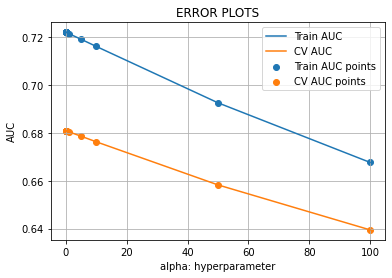

In [155]:
plt.plot(alpha, train_auc, label='Train AUC')
plt.plot(alpha, cv_auc, label='CV AUC')

plt.scatter(alpha, train_auc, label='Train AUC points')
plt.scatter(alpha, cv_auc, label='CV AUC points')

plt.legend()
plt.xlabel("alpha: hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.grid()
plt.show()

In [159]:
# Obtain the optimal value for 'alpha' and using the obtained optimal 'alpha' value, fit a multinomial naive bayes model, on the train data,
# Note: If you have split the datase into 3 parts (ie., train, cv and test sets) in the beginning, then the training datafor this final model would be (train set + cv set)
# Make class label and probability predictions on the train and test data.
from scipy.sparse import vstack
clf = MultinomialNB(alpha=best_alpha, fit_prior=True, class_prior=class_prior)
clf.fit(vstack((X_tr,X_cr)).tocsr(),np.concatenate((y_train,y_cv),axis=0))

MultinomialNB(alpha=1e-05, class_prior=[0.5, 0.5])

In [111]:
y_te_pred = clf.predict_proba(X_te)[:,1]
y_tr_pred = clf.predict_proba(vstack((X_tr,X_cr)).tocsr())[:,1]

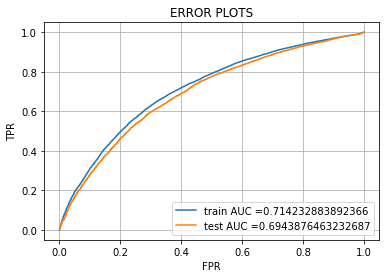

In [121]:
# Plot the ROC-AUC curves using the probability predictions made on train and test data.
train_fpr, train_tpr, tr_thresholds = roc_curve(np.concatenate((y_train,y_cv),axis=0), y_tr_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_te_pred)

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ERROR PLOTS")
plt.grid()
plt.show()

In [134]:
# Pick the best threshold among the probability estimates, such that it has to yield maximum value for TPR*(1-FPR)
# Plot the confusion matrices(each for train and test data) afer encoding the predicted class labels, on the basis of the best threshod probability estimate.

def find_best_threshold(threshold, fpr, tpr):
    print(np.argmax(tpr*(1-fpr)))
    t = threshold[np.argmax(tpr*(1-fpr))]
    # (tpr*(1-fpr)) will be maximum if your fpr is very low and tpr is very high
    print("the maximum value of tpr*(1-fpr)", max(tpr*(1-fpr)), "for threshold", np.round(t,3))
    return t

def predict_with_best_alpha(proba, threshold):
    predictions = []
    for i in proba:
        if i>=threshold:
            predictions.append(1)
        else:
            predictions.append(0)
    return predictions

In [137]:
print("="*100)
from sklearn.metrics import confusion_matrix
best_t = find_best_threshold(tr_thresholds, train_fpr, train_tpr)
print("Train confusion matrix")
print(confusion_matrix(np.concatenate((y_train,y_cv),axis=0), predict_with_best_alpha(y_tr_pred, best_t)))
print("Test confusion matrix")
print(confusion_matrix(y_test, predict_with_best_alpha(y_te_pred, best_t)))

7009
the maximum value of tpr*(1-fpr) 0.4422292807287392 for threshold 0.469
Train confusion matrix
[[ 7440  3643]
 [21195 40918]]
Test confusion matrix
[[ 3500  1959]
 [10628 19965]]


#### Set 2

In [162]:
# Perform Hyperparameter Tuning.
# Plot the training and the CV AUC scores, for different values of 'alpha', using a 2D line plot
# Perform Hyperparameter Tuning.
# Plot the training and the CV AUC scores, for different values of 'alpha', using a 2D line plot
from scipy.sparse import hstack
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score
X_tr = hstack((X_train_essay_tfidf, X_train_state_ohe, X_train_teacher_ohe, X_train_grade_ohe,X_train_clean_categories_ohe,X_train_clean_subcategories_ohe, X_train_price_norm,X_train_teacher_number_of_previously_posted_projects_norm)).tocsr()
X_cr = hstack((X_cv_essay_tfidf, X_cv_state_ohe, X_cv_teacher_ohe, X_cv_grade_ohe,X_cv_clean_categories_ohe,X_cv_clean_subcategories_ohe, X_cv_price_norm,X_cv_teacher_number_of_previously_posted_projects_norm)).tocsr()
X_te = hstack((X_test_essay_tfidf, X_test_state_ohe, X_test_teacher_ohe, X_test_grade_ohe,X_test_clean_categories_ohe,X_test_clean_subcategories_ohe, X_test_price_norm,X_test_teacher_number_of_previously_posted_projects_norm)).tocsr()

print("Final Data matrix")
print(X_tr.shape, y_train.shape)
print(X_cr.shape, y_cv.shape)
print(X_te.shape, y_test.shape)
print("="*100)

from sklearn.naive_bayes import MultinomialNB

train_auc = []
cv_auc = []
alpha = [0.00001,0.0005, 0.0001,0.005,0.001,0.05,0.01,0.1,0.5,1,5,10,50,100]
class_prior = [0.5, 0.5]
for i in tqdm(alpha):
    clf = MultinomialNB(alpha=i, fit_prior=True, class_prior=class_prior)
    clf.fit(X_tr,y_train)
    y_train_pred = clf.predict_proba(X_tr)[:,1]
    
    y_cv_pred = clf.predict_proba(X_cr)[:,1]
    train_auc.append(roc_auc_score(y_train,y_train_pred))
    cv_auc.append(roc_auc_score(y_cv, y_cv_pred))

 14%|█▍        | 2/14 [00:00<00:01, 11.23it/s]

Final Data matrix
(49041, 12227) (49041,)
(24155, 12227) (24155,)
(36052, 12227) (36052,)


100%|██████████| 14/14 [00:01<00:00, 12.85it/s]


In [163]:
#Find best Alpha
best_alpha = alpha[np.argmax(np.array(train_auc) * np.array(cv_auc))]

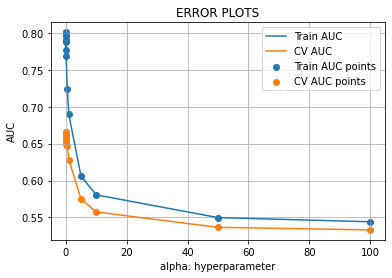

In [164]:
plt.plot(alpha, train_auc, label='Train AUC')
plt.plot(alpha, cv_auc, label='CV AUC')

plt.scatter(alpha, train_auc, label='Train AUC points')
plt.scatter(alpha, cv_auc, label='CV AUC points')

plt.legend()
plt.xlabel("alpha: hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.grid()
plt.show()

In [165]:
# Obtain the optimal value for 'alpha' and using the obtained optimal 'alpha' value, fit a multinomial naive bayes model, on the train data,
# Note: If you have split the datase into 3 parts (ie., train, cv and test sets) in the beginning, then the training datafor this final model would be (train set + cv set)
# Make class label and probability predictions on the train and test data.

from scipy.sparse import vstack
clf = MultinomialNB(alpha=best_alpha, fit_prior=True, class_prior=class_prior)
clf.fit(vstack((X_tr,X_cr)).tocsr(),np.concatenate((y_train,y_cv),axis=0))

MultinomialNB(alpha=0.005, class_prior=[0.5, 0.5])

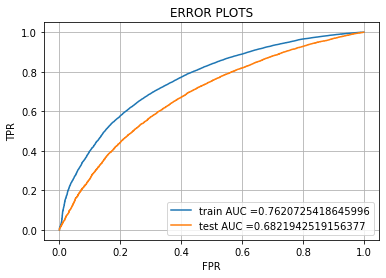

In [166]:
# Plot the ROC-AUC curves using the probability predictions made on train and test data.
y_te_pred = clf.predict_proba(X_te)[:,1]
y_tr_pred = clf.predict_proba(vstack((X_tr,X_cr)).tocsr())[:,1]

train_fpr, train_tpr, tr_thresholds = roc_curve(np.concatenate((y_train,y_cv),axis=0), y_tr_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_te_pred)

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ERROR PLOTS")
plt.grid()
plt.show()

In [168]:
# Pick the best threshold among the probability estimates, such that it has to yield maximum value for TPR*(1-FPR)
# Plot the confusion matrices(each for train and test data) afer encoding the predicted class labels, on the basis of the best threshod probability estimate.
def find_best_threshold(threshold, fpr, tpr):
    print(np.argmax(tpr*(1-fpr)))
    t = threshold[np.argmax(tpr*(1-fpr))]
    # (tpr*(1-fpr)) will be maximum if your fpr is very low and tpr is very high
    print("the maximum value of tpr*(1-fpr)", max(tpr*(1-fpr)), "for threshold", np.round(t,3))
    return t

def predict_with_best_alpha(proba, threshold):
    predictions = []
    for i in proba:
        if i>=threshold:
            predictions.append(1)
        else:
            predictions.append(0)
    return predictions
print("="*100)
from sklearn.metrics import confusion_matrix
best_t = find_best_threshold(tr_thresholds, train_fpr, train_tpr)
print("Train confusion matrix")
print(confusion_matrix(np.concatenate((y_train,y_cv),axis=0), predict_with_best_alpha(y_tr_pred, best_t)))
print("Test confusion matrix")
print(confusion_matrix(y_test, predict_with_best_alpha(y_te_pred, best_t)))

6121
the maximum value of tpr*(1-fpr) 0.48405915987783005 for threshold 0.507
Train confusion matrix
[[ 7843  3240]
 [19626 42487]]
Test confusion matrix
[[ 3330  2129]
 [10306 20287]]


In [243]:
# Either from set 1 (or) set 2, print the names of the top 20 features associated with the positive and negative classes each. (You have to print the names of the features, but not the indexes)
#Get top 20 Features
#Negative Class
feat_index_neg = clf.feature_log_prob_[0].argsort()[::-1][0:20]
imp_feat_neg = [feature_names[i] for i in feat_index_neg]
#Positive Class
feat_index_pos = clf.feature_log_prob_[1].argsort()[::-1][0:20]
imp_feat_pos = [feature_names[i] for i in feat_index_pos]
print("="*100)
print('Top 20 features for Negative class ')
for i in imp_feat_neg:
    print(i)
print("="*100)
print('Top 20 features for Positive class ')
for i in imp_feat_pos:
    print(i)
    
set(imp_feat_neg).symmetric_difference(set(imp_feat_pos))  

Top 20 features for Negative class 
Price
teacher_number_of_previously_posted_projects
mrs
literacy_language
grades_prek_2
math_science
ms
grades_3_5
literacy
mathematics
literature_writing
grades_6_8
specialneeds
specialneeds
ca
health_sports
students
appliedlearning
appliedsciences
grades_9_12
Top 20 features for Positive class 
Price
teacher_number_of_previously_posted_projects
mrs
literacy_language
grades_prek_2
math_science
ms
grades_3_5
literacy
mathematics
literature_writing
grades_6_8
ca
students
health_sports
specialneeds
specialneeds
appliedlearning
grades_9_12
mr


{'appliedsciences', 'mr'}

<h1>3. Summary</h1>

<br> as mentioned in the step 5 of instructions

In [248]:
#Summarize your assignment work here in a few points, and also compare the final models (from set 1 and set 2), in terms of optimal hyperparameter value 'alpha', training AUC and test AUC scores.
# You can either use a pretty table or any other tabular structure.
# Reference Link for Pretty table:  https://pypi.org/project/prettytable/

from prettytable import PrettyTable
x = PrettyTable()
x.field_names = ["Set", "Alpha", "Training AUC", "Test AUC"]
x.add_row(['Set1',0.00001,0.714,0.694])
x.add_row(['Set2',0.005,0.762,0.682])

#Summary
#1. The Goal of the assignment is to classify a given query point under project_is_approved
#2. Data is split into Train,CV and Test.
#2. Set 1 of training data consists of the Categorical columns which are one hot encoded 
#.  and essay which is  encoded using BOW and numerical data normalized.
#3. Set 2 of training data consists of the Categorical columns which are one hot encoded 
#.  and essay which is  encoded using TFIDF and numerical data normalized.
#4. Multinomial Naive Bayes is fitted on Training Data and best Hyperparameter alpha is found using CV for both Set1 and Set2.
#5. Also Confusion matrix is calculated for both Set1 and Set2.
print(x)

+------+-------+--------------+----------+
| Set  | Alpha | Training AUC | Test AUC |
+------+-------+--------------+----------+
| Set1 | 1e-05 |    0.714     |  0.694   |
| Set2 | 0.005 |    0.762     |  0.682   |
+------+-------+--------------+----------+
